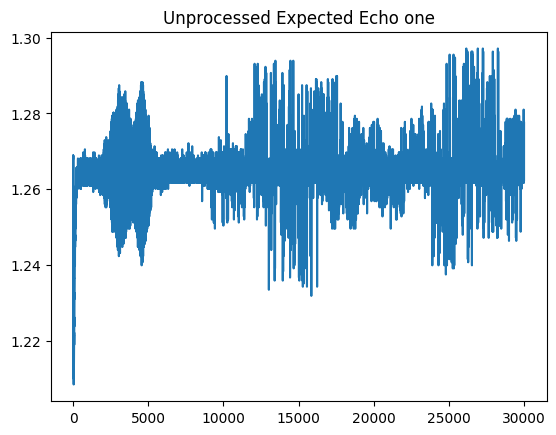

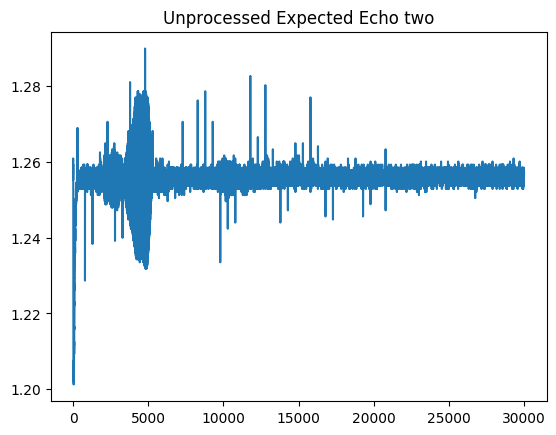

30001
30001


29999-element Array{Float64,1}:
 0.0010145348310470579
 0.001015833020210266 
 0.001011289358139038 
 0.0010067456960678098
 0.0010093420743942261
 0.00101323664188385  
 0.0010145348310470579
 0.001011938452720642 
 0.0009729927778244018
 0.0009723436832427977
 0.0009716945886611937
 0.0009729927778244018
 0.0009749400615692137
 ⋮                    
 0.001013885736465454 
 0.001012587547302246 
 0.0010099911689758299
 0.001011938452720642 
 0.001011289358139038 
 0.001011289358139038 
 0.001011289358139038 
 0.001011938452720642 
 0.00101323664188385  
 0.001012587547302246 
 0.001011289358139038 
 0.001012587547302246 

In [18]:
using SerialPorts
using PyPlot
using FFTW


list_serialports()
array_one = []
array_two = []

b = ""


# ser = SerialPort("COM3:", 9600)
ser = SerialPort("/dev/ttyACM2", 9600)

#=================================================================
Creating a matched filter
=================================================================#

readavailable(ser)
# Start a conversion
#=================================================================#
write(ser, "c")

while bytesavailable(ser) < 1
    continue
end
sleep(0.05)
r = readavailable(ser)

# Get the values
write(ser, "p") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end
    b = string(b, readavailable(ser))

end

array_one=split(b, ("\r\n"))
#=================================================================#
readavailable(ser)
b = ""

write(ser, "d")

while bytesavailable(ser) < 1
    continue
end
sleep(0.05)
r = readavailable(ser)

# Get the values
write(ser, "p") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end
    b = string(b, readavailable(ser))

end

close(ser)

array_two=split(b, ("\r\n"))
#=================================================================#
println(length(array_one))
println(length(array_two))

ac1 = []
i=1

while (i<length(array_one)-1)
    push!(ac1,parse(Int,(array_one[i])))
    i+=1
end

match_one = (3.3/4096).*ac1

figure("Unprocessed Expected Echo one")
title("Unprocessed Expected Echo one")
plot(match_one)

ac2 = []
i=1

while (i<length(array_two)-1)
    push!(ac2,parse(Int,(array_two[i])))
    i+=1
end

match_two = (3.3/4096).*ac2

figure("Unprocessed Expected Echo two")
title("Unprocessed Expected Echo two")
plot(match_two)

FilterOne = (3.3/4096).*match_one
FilterTwo= (3.3/4096).*match_two

In [17]:
using SerialPorts
using PyPlot
using FFTW


list_serialports()

33-element Array{String,1}:
 "/dev/ttyACM2"
 "/dev/ttyS0"  
 "/dev/ttyS1"  
 "/dev/ttyS10" 
 "/dev/ttyS11" 
 "/dev/ttyS12" 
 "/dev/ttyS13" 
 "/dev/ttyS14" 
 "/dev/ttyS15" 
 "/dev/ttyS16" 
 "/dev/ttyS17" 
 "/dev/ttyS18" 
 "/dev/ttyS19" 
 ⋮             
 "/dev/ttyS27" 
 "/dev/ttyS28" 
 "/dev/ttyS29" 
 "/dev/ttyS3"  
 "/dev/ttyS30" 
 "/dev/ttyS31" 
 "/dev/ttyS4"  
 "/dev/ttyS5"  
 "/dev/ttyS6"  
 "/dev/ttyS7"  
 "/dev/ttyS8"  
 "/dev/ttyS9"  